In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from src.environment import prepare_trading_env
from src.utils import load_config
from src.evaluate import evaluate_episode, display_env
from src.optim import train

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO

In [35]:
cfg = load_config("./config/config.yaml")
cfg

{'env': {'ticker': 'ETH-USD',
  'interval': '1h',
  'period': '1y',
  'train_prop': 0.7,
  'window_size': 30,
  'indicators': ['RSI']},
 'a2c': {'policy': 'MlpPolicy',
  'policy_kwargs': {'net_arch': {'vf': [128, 128, 128], 'pi': [64, 64]}},
  'learning_rate': 0.0007,
  'n_steps': 5,
  'gamma': 0.99,
  'verbose': 1},
 'ppo': {'policy': 'MlpPolicy',
  'policy_kwargs': {'net_arch': {'vf': [128, 128, 128], 'pi': [64, 64]}},
  'batch_size': 64,
  'learning_rate': 0.0007,
  'n_steps': 4,
  'gamma': 0.99,
  'n_epochs': 5,
  'clip_range': 0.2,
  'verbose': 0},
 'optim': {'n_episodes': 10,
  'max_no_improvement_evals': 3,
  'min_evals': 5,
  'save_path': 'models/ppo_eth_1y/'}}

In [36]:
env_train, env_test = prepare_trading_env(cfg["env"]) 

[*********************100%***********************]  1 of 1 completed


info: {'total_reward': 233.8035888671875, 'total_profit': 7.118927278041554e-05, 'position': 1, 'avg_position': 0.5059776320863865}


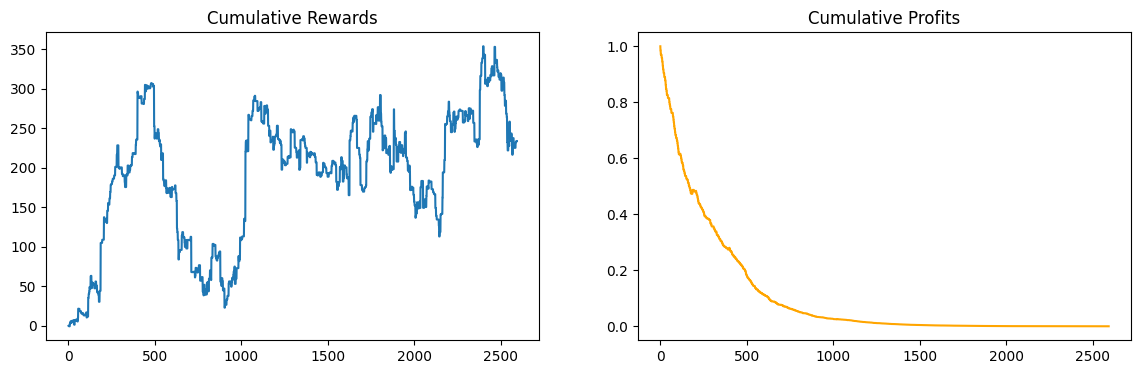

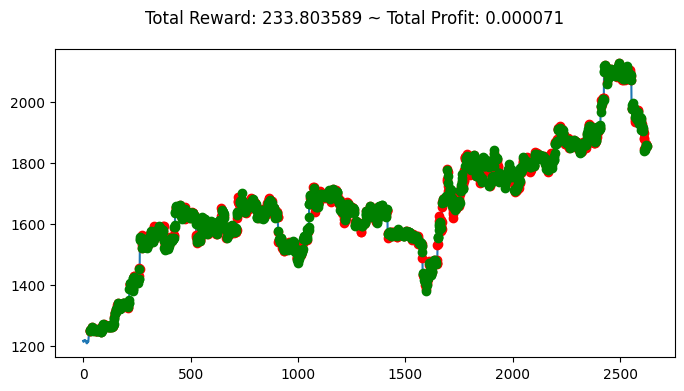

In [50]:
infos = evaluate_episode(env_test, plot=True)
display_env(env_test)

In [31]:
env_train_maker = lambda: env_train
env_test_maker = lambda: env_test

# vectorize environment to pass it to the sb model
env_train_vec = DummyVecEnv(env_fns=[env_train_maker]) 

In [32]:
model_type = "ppo"
cfg_model = cfg[model_type]

if model_type == "a2c": 
    model = A2C
elif model_type == "ppo": 
    model = PPO

model = model(env=env_train_vec, **cfg_model)

c:\Users\pemma\OneDrive - GENES\Ensae\S2\RL\Project\rlsb-trading\env\lib\site-packages\stable_baselines3\ppo\ppo.py:148: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 4
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4 and n_envs=1)
  warnings.warn(


In [9]:
cfg_optim = cfg["optim"]
train(model=model, env=env_train, cfg=cfg_optim)

Output()

Eval num_timesteps=6095, episode_reward=0.00 +/- 0.00

Episode length: 6094.00 +/- 0.00

New best mean reward!

Eval num_timesteps=12190, episode_reward=0.00 +/- 0.00

Episode length: 6094.00 +/- 0.00

Eval num_timesteps=18285, episode_reward=0.00 +/- 0.00

Episode length: 6094.00 +/- 0.00

Eval num_timesteps=24380, episode_reward=0.00 +/- 0.00

Episode length: 6094.00 +/- 0.00

Eval num_timesteps=30475, episode_reward=0.00 +/- 0.00

Episode length: 6094.00 +/- 0.00

Eval num_timesteps=36570, episode_reward=0.00 +/- 0.00

Episode length: 6094.00 +/- 0.00

Eval num_timesteps=48760, episode_reward=0.00 +/- 0.00

Episode length: 6094.00 +/- 0.00

Eval num_timesteps=54855, episode_reward=0.00 +/- 0.00

Episode length: 6094.00 +/- 0.00

Stopping training because there was no new best model in the last 4 evaluations

In [20]:
ppo_model = PPO.load(cfg_optim["save_path"])

info: {'total_reward': 0.0, 'total_profit': 1.4609087329834727, 'position': 1, 'avg_position': 1.0}


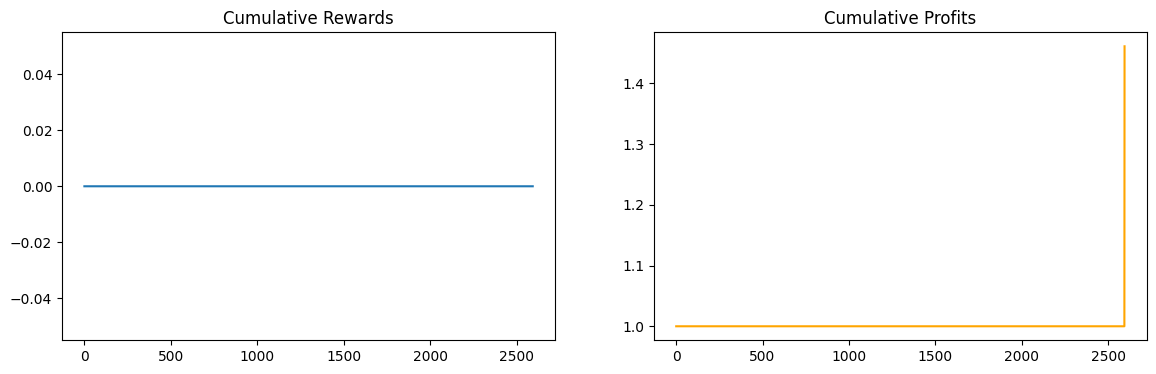

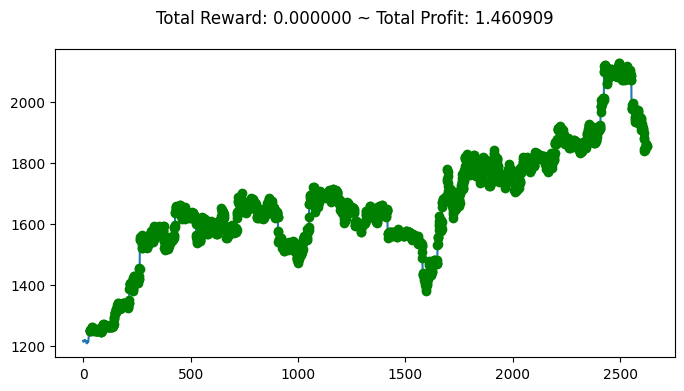

In [51]:
env = env_test_maker()

infos = evaluate_episode(env, ppo_model, plot=True)
display_env(env); 